<center><h1>Xie_Qinghui_HW5</h1></center>
<br>
<br>

Name: Qinghui Xie
<br>
Github Username: qxie44
<br>
USC ID: 7956658480

## 1. Decision Trees as Interpretable Models

Import packages

In [71]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

### (a) Obtain Data

Get the Accute Inamations Data Set

In [72]:
data_File = "../data/diagnosis.data"
columns = [
    "Temperature", "Nausea", "Lumbar Pain", "Urine Pushing", "Micturition Pains",
    "Burning of Urethra", "Inflammation", "Nephritis"
]
df = pd.read_csv(
    data_File, 
    header=None, 
    names=columns, 
    encoding='utf-16',
    sep=r'\s+', #separates as space
    engine='python', 
    decimal=',' #the comma from the data is a decimal
)
df.head(5)




,Temperature,Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Inflammation,Nephritis
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no


In [73]:
#change into binary 1/0
df = df.replace({'yes': 1, 'no': 0})
display(df.head(5))


,Temperature,Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Inflammation,Nephritis
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0


### (b) Build a decision tree

In [74]:
#Class 0: both d1 and d2 are 0
#Class 1: d1 is 1 and d2 is 0
#Class 2: d1 is 0 and d2 is 1
#Class 3: both d1 and d2 are 1

def classify(row):
    if row['Inflammation'] == 0 and row['Nephritis'] == 0:
        return 0 
    elif row['Inflammation'] == 1 and row['Nephritis'] == 0:
        return 1  
    elif row['Inflammation'] == 0 and row['Nephritis'] == 1:
        return 2 
    elif row['Inflammation'] == 1 and row['Nephritis'] == 1:
        return 3  

df['class'] = df.apply(classify, axis=1)
display(df.head(5))

#ensuring there are distinct classes
print(df['class'].nunique())

,Temperature,Nausea,Lumbar Pain,Urine Pushing,Micturition Pains,Burning of Urethra,Inflammation,Nephritis,class
0,35.5,0,1,0,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0,1
2,35.9,0,1,0,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0,1
4,36.0,0,1,0,0,0,0,0,0


4


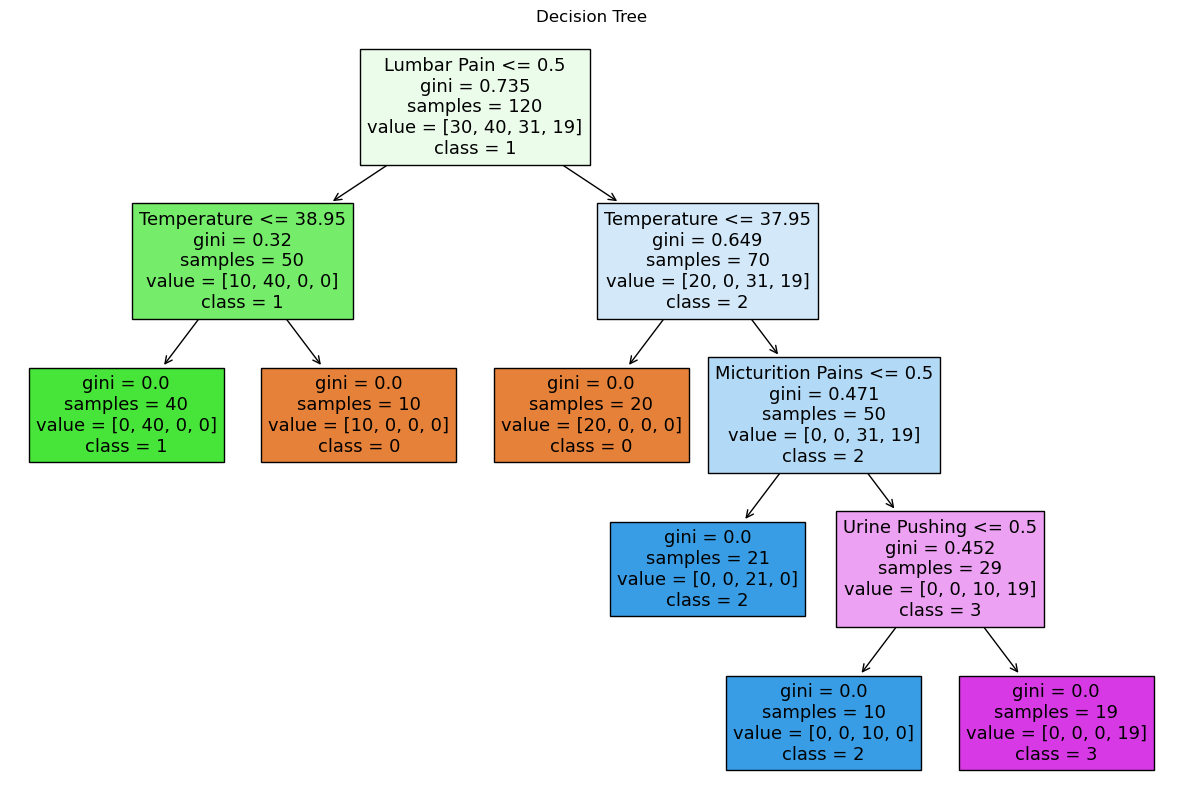

In [75]:
X = df.drop(columns=['class', 'Inflammation', 'Nephritis'])
y = df['class']
dt = tree.DecisionTreeClassifier()
dt.fit(X, y)
plt.figure(figsize=(15, 10))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=[str(i) for i in dt.classes_])
plt.title('Decision Tree')
plt.show()

### (c) Convert the decision rules

In [76]:
#code grabbed from:https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
def tree_to_pseudo(tree, feature_names):
	left = tree.tree_.children_left
	right = tree.tree_.children_right
	threshold = tree.tree_.threshold
	features = [feature_names[i] for i in tree.tree_.feature]
	value = tree.tree_.value

	def recurse(left, right, threshold, features, node, depth=0):
		indent = "  " * depth
		if (threshold[node] != -2):
			print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")
			if left[node] != -1:
				recurse (left, right, threshold, features, left[node], depth+1)
				print(indent,"} else {")
				if right[node] != -1:
					recurse (left, right, threshold, features, right[node], depth+1)
				print(indent,"}")
		else:
			print(indent,"return " + str(value[node]))

	recurse(left, right, threshold, features, 0)

tree_to_pseudo(dt, X.columns)

 if ( Lumbar Pain <= 0.5 ) {
   if ( Temperature <= 38.95000076293945 ) {
     return [[ 0. 40.  0.  0.]]
   } else {
     return [[10.  0.  0.  0.]]
   }
 } else {
   if ( Temperature <= 37.95000076293945 ) {
     return [[20.  0.  0.  0.]]
   } else {
     if ( Micturition Pains <= 0.5 ) {
       return [[ 0.  0. 21.  0.]]
     } else {
       if ( Urine Pushing <= 0.5 ) {
         return [[ 0.  0. 10.  0.]]
       } else {
         return [[ 0.  0.  0. 19.]]
       }
     }
   }
 }


### (d) Cost-complexity pruning

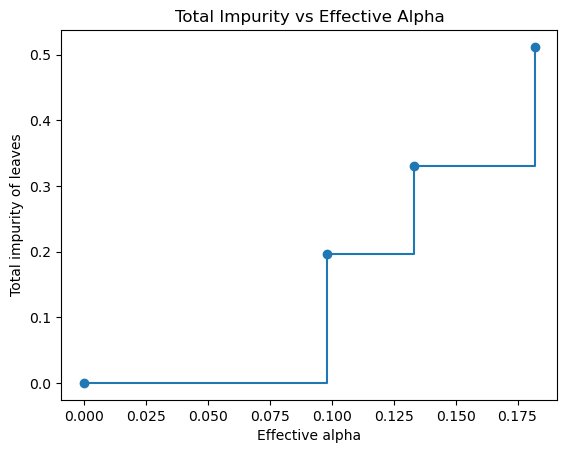

In [77]:
#referenced: https://scikit-learn.org/1.5/auto_examples/tree/plot_cost_complexity_pruning.html

path = dt.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
plt.xlabel('Effective alpha')
plt.ylabel('Total impurity of leaves')
plt.title('Total Impurity vs Effective Alpha')
plt.show()


## 2. The LASSO and Boosting for Regression

### (a) Obtain Data

In [78]:
community_data = "../data/communities.data"
community_names = "../data/communities.names"
with open(community_names, 'r') as f:
    # name file has attributes with @
    lines = f.readlines()
    comm_col = [line.split()[1] for line in lines if line.startswith('@attribute')]

comm_df = pd.read_csv(community_data, header=None, na_values="?")
comm_df.columns = comm_col
comm_df.head(5)



,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [79]:
#document says they are non predictive and have many missing values so i am dropping
comm_df = comm_df.drop(columns=['state','county', 'community', 'communityname', 'fold'])
comm_df.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


### (b) Missing values

In [80]:
#fill the null values with the mean of the data
comm_df.fillna(comm_df.mean(), inplace=True)



### (c) Plot a correlation matrix

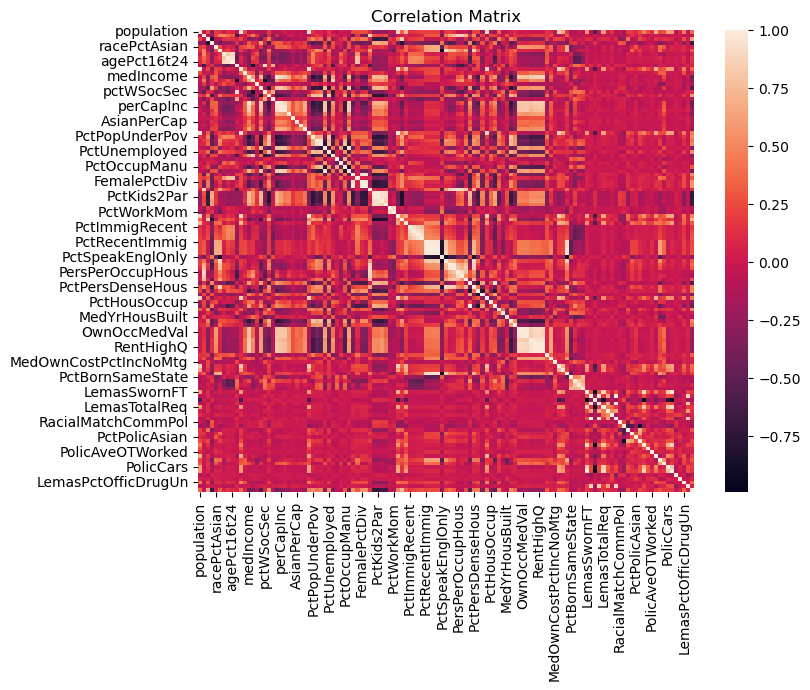

In [81]:
correlation_matrix = comm_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix)
plt.title('Correlation Matrix')
plt.show()

### (d) Calculate the Coefficient of Variation CV

In [82]:
mean_values = comm_df.mean()
std_val = comm_df.std()
cv_val = std_val / mean_values
cv_df = pd.DataFrame(cv_val, columns=['Coefficient of Variation'])
print(cv_df)

                     Coefficient of Variation
population                           2.203503
householdsize                        0.353298
racepctblack                         1.410920
racePctWhite                         0.323782
racePctAsian                         1.359162
...                                       ...
LemasPctPolicOnPatr                  0.122331
LemasGangUnitDeploy                  0.368040
LemasPctOfficDrugUn                  2.555266
PolicBudgPerPop                      0.337281
ViolentCrimesPerPop                  0.979015

[123 rows x 1 columns]


### (e) Scatter plots and box plots for highest CV features

['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

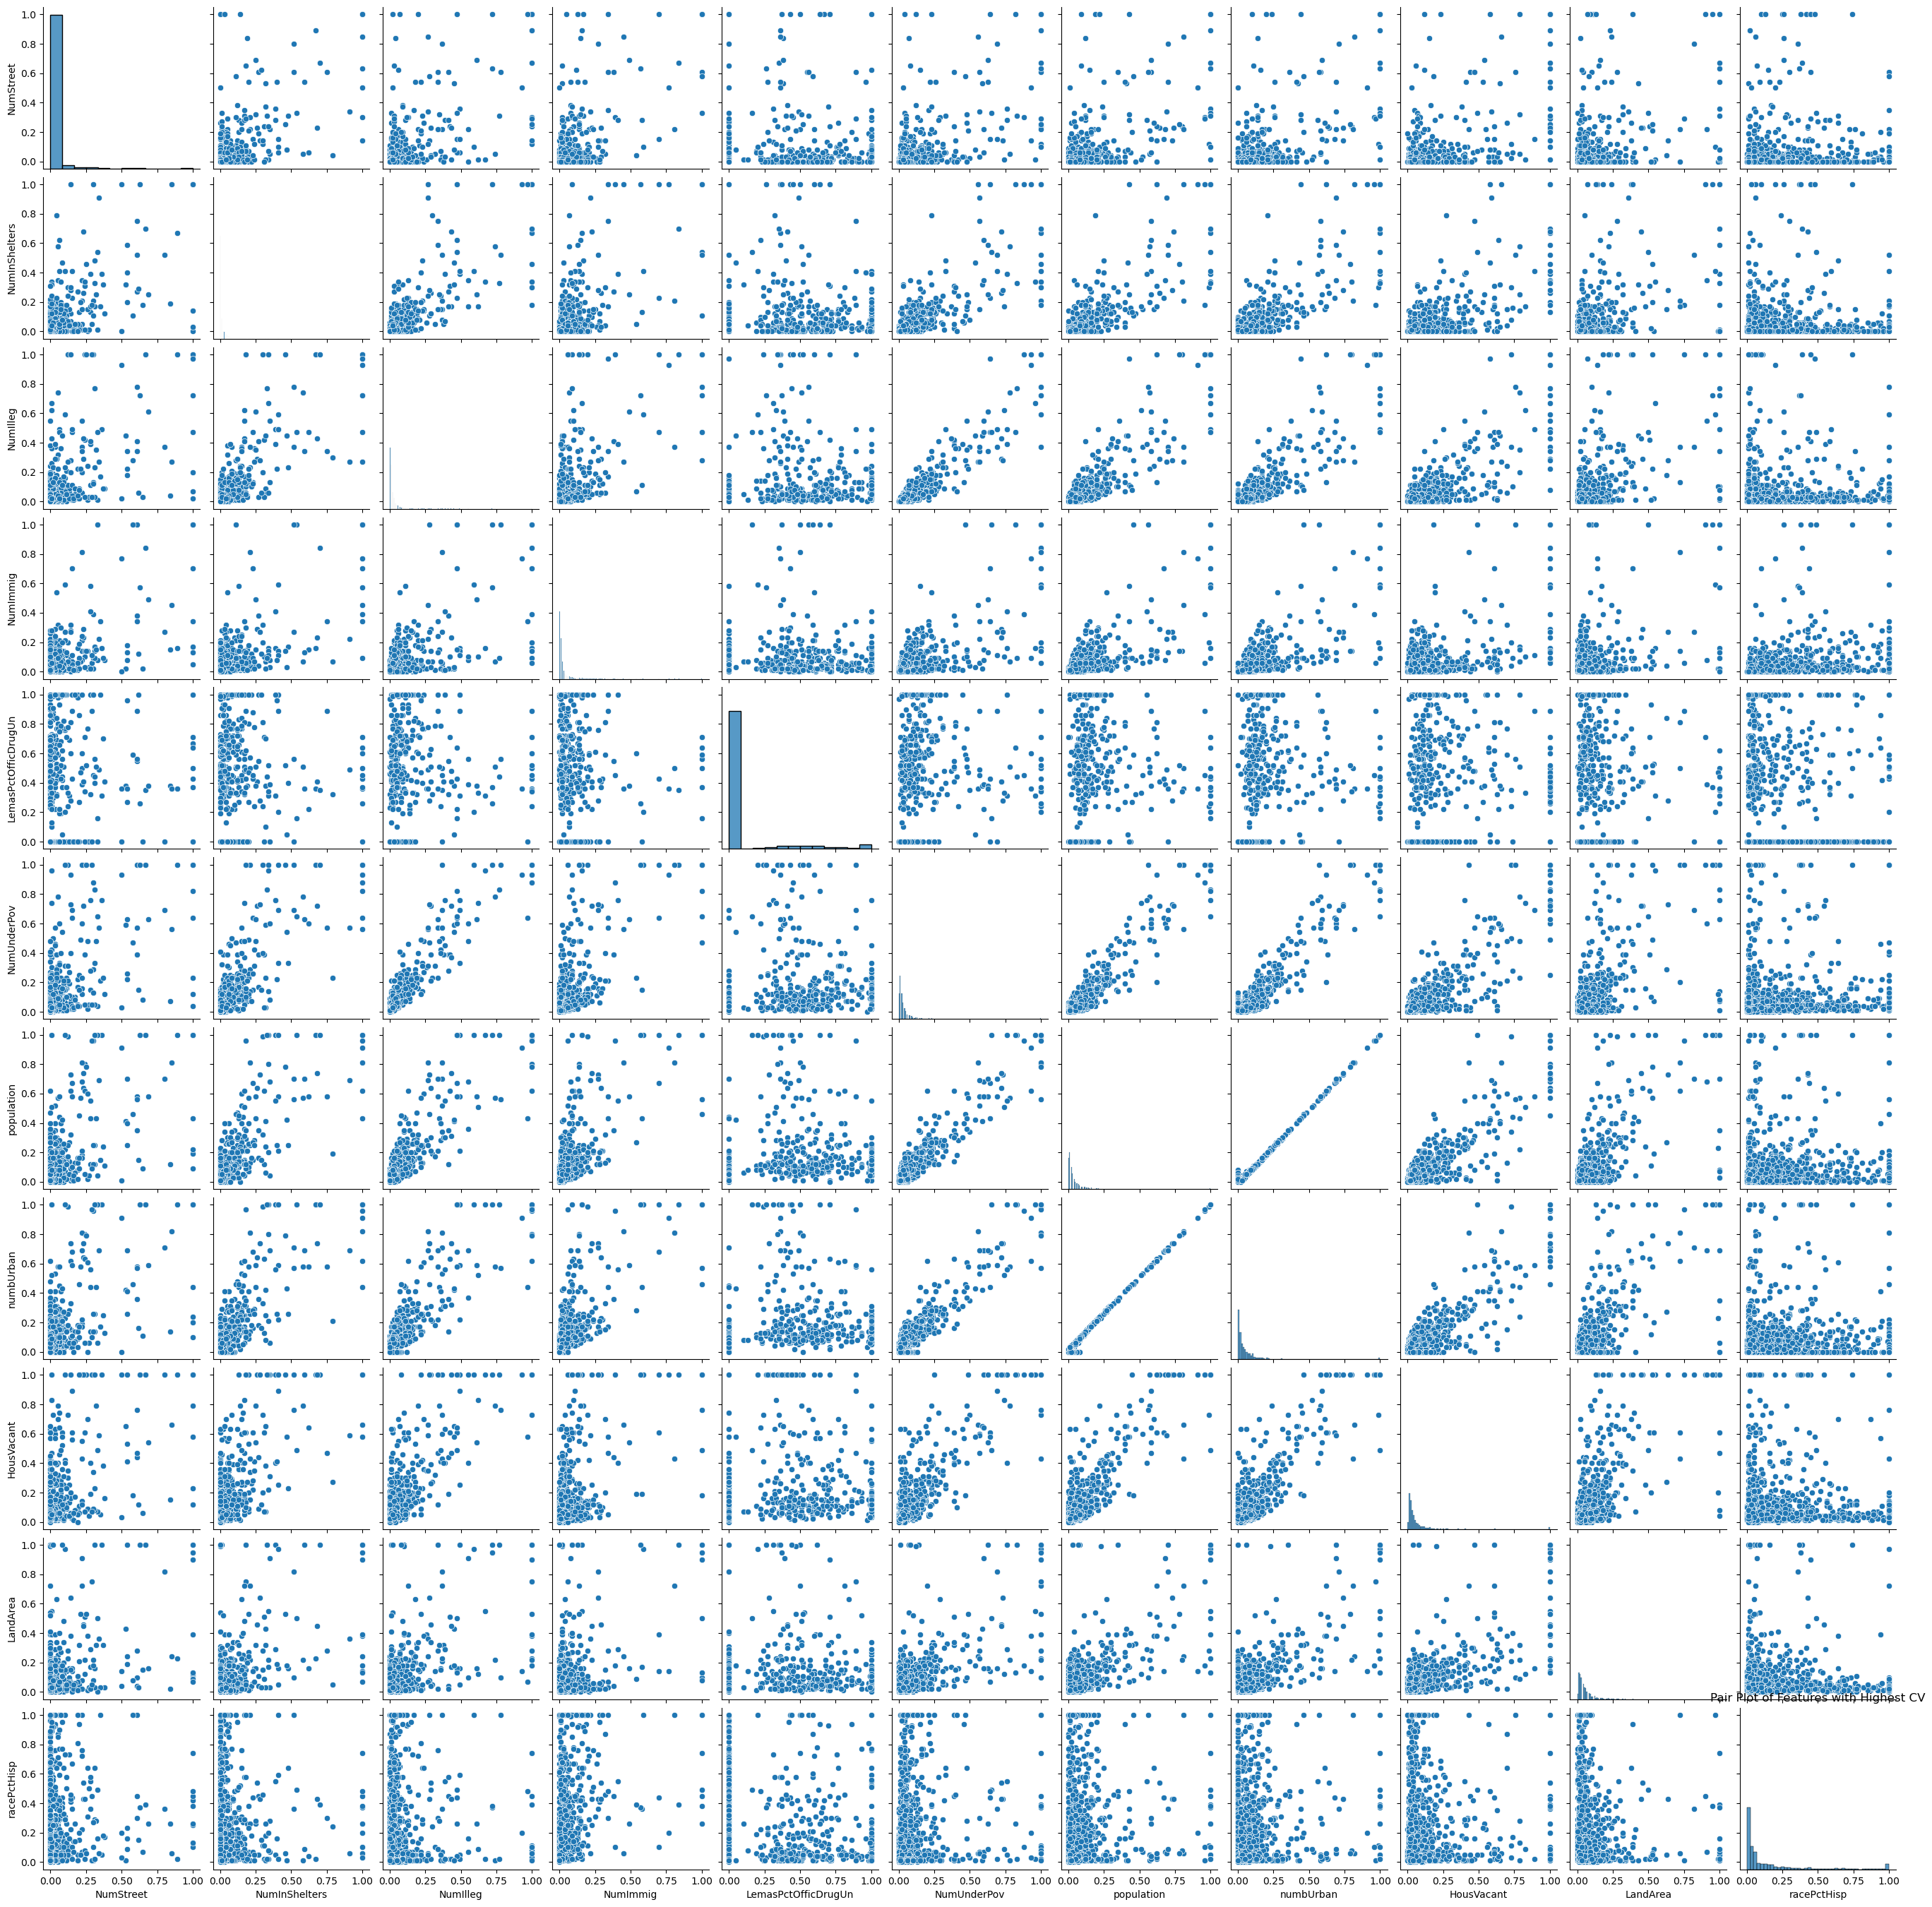

In [83]:
highest_cv = cv_df.nlargest(int(np.sqrt(128)), 'Coefficient of Variation').index.tolist()
print(highest_cv)
sns.pairplot(comm_df[highest_cv])
plt.title('Pair Plot of Features with Highest CV')
plt.show()

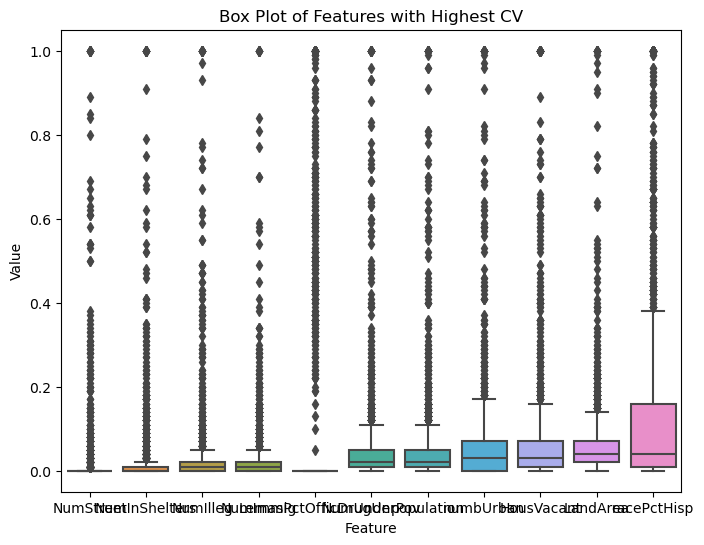

In [84]:
boxplot_df = comm_df[highest_cv]
melted_df = boxplot_df.melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(8, 6)) 
sns.boxplot(x='Feature', y='Value', data=melted_df)
plt.title('Box Plot of Features with Highest CV')
plt.show()

There are some plots with linear relationships, some with correlation, and other with no correlation. It's difficult to draw a conclusion from the scatter plot. 

### (f) Fit a linear model

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [86]:
train_df = comm_df.iloc[:1495]
test_df = comm_df.iloc[1495:]
#ViolentCrimesPerPop to be predicted
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1:]
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1:]

In [87]:
regModel= LinearRegression().fit(X_train, y_train)
y_pred = regModel.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Test RMSE: {mse}')

Test RMSE: 0.7897255274384668


### (g) Fit a ridge regression model

In [88]:
from sklearn.linear_model import RidgeCV

In [89]:
alphas = np.logspace(-4, 4, 100)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)
y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Test MSE: {mse_ridge}')

Test MSE: 0.017603069934714156


### (h) Fit a LASSO model

In [90]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [91]:
alphas = np.logspace(-4, 4, 100)
lasso_cv = LassoCV(alphas=alphas, cv=5)
lasso_cv.fit(X_train, y_train)
y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Test MSE: {mse_lasso}')
#ensure coef > 0 
print('Selected features (LASSO):', X_train.columns[lasso_cv.coef_ != 0].tolist())
print(len( X_train.columns[lasso_cv.coef_ != 0].tolist()))

Test MSE: 0.017752298035477548
Selected features (LASSO): ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn

In [92]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lasso_cv_scaled = LassoCV(alphas=alphas, cv=5)
lasso_cv_scaled.fit(X_train_scaled, y_train)

y_pred_lasso_scaled = lasso_cv_scaled.predict(X_test_scaled)
mse_lasso_scaled = mean_squared_error(y_test, y_pred_lasso_scaled)
print(f'Test MSE Standardlize: {mse_lasso_scaled}')
print('Selected features (LASSO):', X_train.columns[lasso_cv_scaled.coef_ != 0].tolist())
print(len( X_train.columns[lasso_cv_scaled.coef_ != 0].tolist()))

Test MSE Standardlize: 0.01780720617779211
Selected features (LASSO): ['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'PctEmplManu', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRec5', 'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'RentLowQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctSameCity85', 'LemasSwFTFieldP

For unstandardized, I got an error of  0.01775 and 75 selected features. 
For standardized, I got an error of 0.0178 and 73 selected features. 
Although similar error, the standardized have less features which can be better for model complexitity. 

### (i) Fit a PCR model

In [93]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [94]:
X_train.shape

(1495, 122)

In [100]:
mse_scores = []
#122 features
for m in range (1, 123):
    pca = PCA(n_components=m)
    X_train_pca = pca.fit_transform(X_train)
    model = LinearRegression()
    mse = cross_val_score(model, X_train_pca, y_train, cv= 5,scoring='neg_mean_squared_error')
    mse = -mse.mean()
    mse_scores.append(mse)
#adjust to 0 index
best_m = np.argmin(mse_scores) + 1 
print("best M:", best_m)
lowest_mse = mse_scores[best_m - 1]
print("min mse:", lowest_mse)

best M: 96
min mse: 0.019413856202907726


In [96]:
pca_new = PCA(n_components= best_m)
x_train_best = pca_new.fit_transform(X_train)
x_test_optimal = pca_new.transform(X_test)
model = LinearRegression()
model.fit(x_train_best, y_train)
y_pred = model.predict(x_test_optimal)
test_mse = mean_squared_error(y_test, y_pred)
print( "test mse:", test_mse)

test mse: 0.018480970861072196


### (j) Fit a boosting tree

In [97]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [98]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
params = {
    'alpha': np.logspace(-4, 4, 10)
}
grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_a = grid_search.best_params_['alpha']
best_score = -grid_search.best_score_
print("best alpha:", best_a)
print("best mse:", best_score)

best alpha: 2.782559402207126
best mse: 0.021113884935880713


In [99]:
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mse_XG = mean_squared_error(y_test, y_pred)
print("test MSE:", test_mse_XG)

test MSE: 0.01913544818056787
